In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [ ]:
# Make sure these are alreday created

input_image = '../input/img1.png' # Path of input .png image
folder1a = '../output1a/' # Folder of output image
folder1b = '../output1b'
folder1c = '../output1c'

We first apply different transformations to the image to get an idea of which ones are most distinguishable.

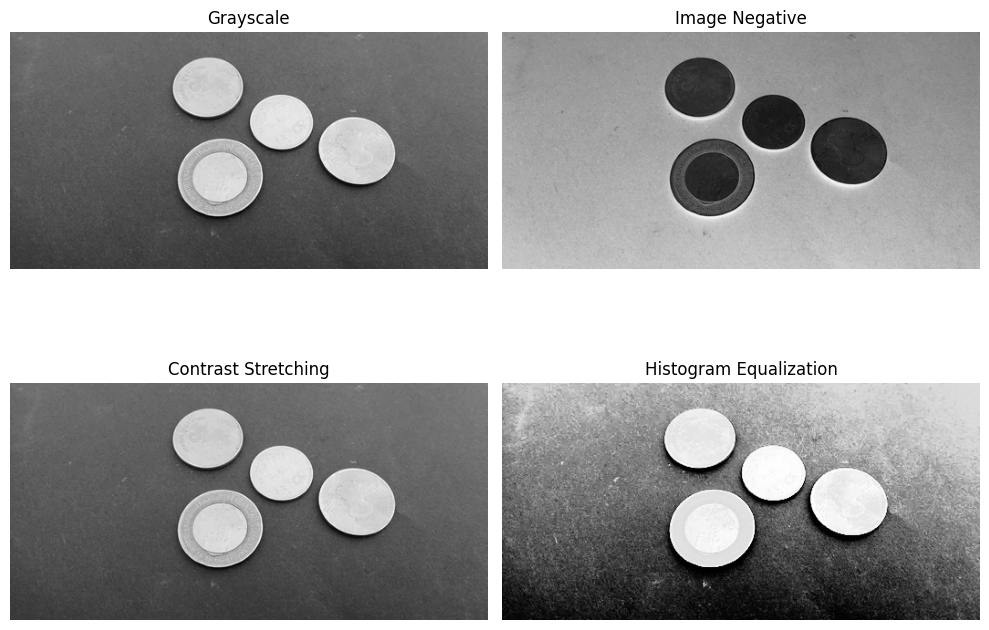

In [6]:
# Read the image
image = cv2.imread(input_image)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create image negative
negative = 255 - gray

# Contrast stretching
min_val = np.min(gray)
max_val = np.max(gray)
contrast_stretch = ((gray - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Histogram equalization
equalized = cv2.equalizeHist(gray)

# Save the processed images
cv2.imwrite(folder1a + 'grayscale.png', gray)
cv2.imwrite(folder1a + 'image_negative.png', negative)
cv2.imwrite(folder1a + 'contrast_stretch.png', contrast_stretch)
cv2.imwrite(folder1a + 'histogram_equalized.png', equalized)

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('Grayscale')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Image Negative')
plt.imshow(negative, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Contrast Stretching')
plt.imshow(contrast_stretch, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Histogram Equalization')
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Applying Canny edge detector and saving output to folder1b

In [7]:


for filename in os.listdir(folder1a):
    if filename.endswith('.png'):
        image_path = os.path.join(folder1a, filename)
        image = cv2.imread(image_path)

        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray =cv2.GaussianBlur(image, (13,13), 2) # Blurrig with kernel of size 9x9 and std. dev = 2
        edges = cv2.Canny(gray, 100, 200)

        # Highlight edges in green on the original image
        highlighted = image.copy()
        highlighted[edges != 0] = [240, 0, 255]

        # Save the highlighted image in the output folder
        output_path = os.path.join(folder1b, f'highlighted_{filename}')
        cv2.imwrite(output_path, highlighted)

print('[0] Edge detection and highlighting complete')


[0] Edge detection and highlighting complete


Now we do region-based segmentaion to get contours for each coin. 

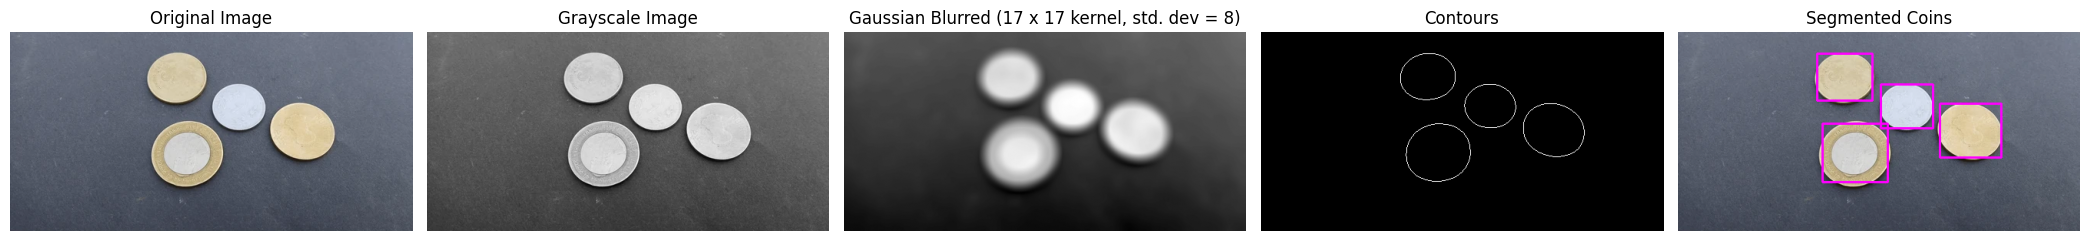

Number of coins detected: 4


In [ ]:

def segment_and_count(image_path, output_folder='folderX'):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (17, 17), 8)

    # Binary thresholding
    _, thresh = cv2.threshold(blurred, 160, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter valid contours based on area
    valid_contours = [c for c in contours if 100 < cv2.contourArea(c) < 6000]

    contour_visual = np.zeros_like(gray)
    cv2.drawContours(contour_visual, valid_contours, -1, (255), 1)

    # Segmenting individual coins i.e. making bounding boxes around each
    segmented_coins = image.copy()
    for i, contour in enumerate(valid_contours):
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(segmented_coins, (x, y), (x + w, y + h), (255, 0, 255), 2)

        # Extract and save individual coin images
        coin = image[y:y+h, x:x+w]
        coin_path = os.path.join(output_folder, f'coin_{i+1}.png')
        cv2.imwrite(coin_path, coin)

    # Visualization
    fig, axes = plt.subplots(1, 5, figsize=(21, 7))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(gray, cmap='gray')
    axes[1].set_title('Grayscale Image')
    axes[1].axis('off')

    axes[2].imshow(blurred, cmap='gray')
    axes[2].set_title('Gaussian Blurred (17 x 17 kernel, std. dev = 8)')
    axes[2].axis('off')

    axes[3].imshow(contour_visual, cmap='gray')
    axes[3].set_title('Contours')
    axes[3].axis('off')

    axes[4].imshow(cv2.cvtColor(segmented_coins, cv2.COLOR_BGR2RGB))
    axes[4].set_title('Segmented Coins')
    axes[4].axis('off')

    plt.tight_layout()
    plt.show()

    return len(valid_contours)

coin_count = segment_and_count(image_path=input_image)
print(f"Number of coins detected: {coin_count}")
